## ANLY 590 HW 3

### Xunge Jiang 
#### netid xj64

### 12/06

## Problem 1: Autoencoder

In [6]:
import tensorflow as tf
import keras
# Importing core neural networks layers 
from keras.layers import Input, Dense, Dropout, Activation, Flatten
# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D
# Tools for data transformation
from keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#import the data
from keras.datasets import fashion_mnist

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# =========================
#  Reshaping train and test
# =========================
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

# Encoding Step: Conv2D, MaxPooling 
x = Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoding + Upsampling2D
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size = 64,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3289 - val_loss: 0.3034
Epoch 2/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2969 - val_loss: 0.2959
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2914 - val_loss: 0.2916
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2885 - val_loss: 0.2909
Epoch 5/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2866 - val_loss: 0.2878
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2852 - val_loss: 0.2867
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2842 - val_loss: 0.2856
Epoch 8/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2834 - val_loss: 0.2851
Epoch 9/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2827 - val_loss: 0.2850
Epoch

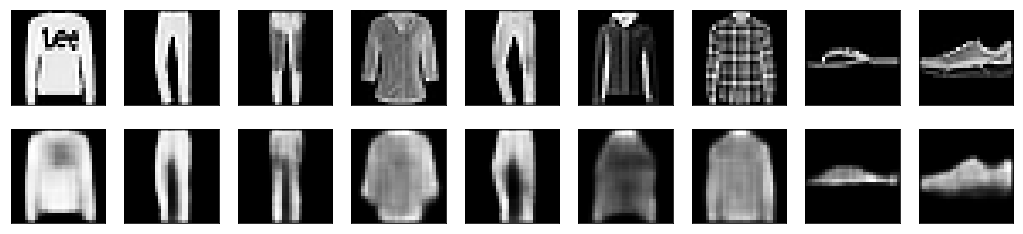

In [17]:
# Reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # autoencoder reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Problem 2

#### 2.1 Deep CNN

The architecture of CNN is as follows: 
1. Start with two 2D convolution layers of 32 kernels with size 3 by 3, stride = (1,1), padding = 'valid'.
2. Downsampling by adding one MaxPooling Layer of size 2 by 2. 
3. Add dropout which is 0.25
4. Add another convolution layer of 32 kernels with size 3 by 3, stride = (1,1), padding = 'valid'. 
5. Flatten the output.
6. Add two Dense layers. 
7. Use softmax activation, adam optimizer and cross entropy as metric since y has 10 classes so it is a multi-class classification problem. 

I choose three convolution layers total since I think it is enough for training. Also, other architectural choices are the basic setting for layers. 

In [18]:
# Split to train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
model = Sequential()
# add 2 convolutional layers
model.add(Conv2D(filters = 32,kernel_size=(3, 3), activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
# downsampling by maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout = 0.25
model.add(Dropout(0.25))
# add another convolutional layer
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='valid'))

# flatten and 2 dense layers + softmax activation on ten categories
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model with adamoptimizer 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [26]:
# fit the model
trained_model = model.fit(X_train, Y_train, epochs=15, batch_size=64, verbose = 0)

In [34]:
model.summary()
test_result = model.evaluate(X_test, Y_test, batch_size=64, verbose = 0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
__________

In [35]:
print('Accuracy on Training Set is: ', trained_model.history['acc'][-1])
print('Accuracy on Test Set is: ', test_result[1])

Accuracy on Training Set is:  0.9927333333333334
Accuracy on Test Set is:  0.922


#### 2.2 Transfer Learning

In [10]:
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

#import the data
from keras.datasets import fashion_mnist
from keras.utils import np_utils
import numpy as np
from keras.layers import Input, Dense, Dropout

In [2]:
# Split to train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
# Resize the images to match requirement of VGG16
from keras.preprocessing.image import img_to_array, array_to_img
# stack 
X_train = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in X_train])
X_test = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in X_test])
X_train = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((48, 48))) for im in X_train])/255
X_test = np.asarray([img_to_array(array_to_img(im, scale  = False).resize((48, 48))) for im in X_test])/255

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [11]:
# load the base model
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48,48,3))

# fit the model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

# freeze the base model weights
conv_base.trainable = False
# compile
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])

In [12]:
# fit
history = model.fit(X_train, Y_train, epochs=5, batch_size=128, verbose = 1)

Epoch 1/5
60000/60000 [==============================] - 2252s 38ms/step - loss: 14.4878 - acc: 0.0994
Epoch 2/5
60000/60000 [==============================] - 2235s 37ms/step - loss: 14.5186 - acc: 0.0992
Epoch 3/5
60000/60000 [==============================] - 2231s 37ms/step - loss: 14.5160 - acc: 0.0994
Epoch 4/5
60000/60000 [==============================] - 2237s 37ms/step - loss: 14.5117 - acc: 0.0997
Epoch 5/5
60000/60000 [==============================] - 2233s 37ms/step - loss: 14.4998 - acc: 0.1004


In [13]:
# evaluate the model
score = model.evaluate(X_test, Y_test, batch_size=64, verbose = 0)

In [17]:
print('Train loss: ', history.history['loss'][4]) 
print('Train accuracy: ', history.history['acc'][4])

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train loss:  14.499841710917154
Train accuracy:  0.10040000000397364
Test loss:  14.506285699462891
Test accuracy:  0.1


I used the pretrained VGG16 network model with two dense layers, one dropout, and softmax activation for 10 categories and reshaped the input of fashion mnist dataset into size 48 * 48 as a minimum size required by VGG16 model. 

The training of 5 epochs took a long time, nearly 3 hours. The training accuracy after 5 epochs reaches 0.1, so as the test accuracy. Both training and test loss/accuracy are similarly poor. The pretrained model performed worse than the deep CNN.

I assume that if there were more time allowed, more epochs can be used to improve the accuracy. 

## Problem 3

#### 3.1 RNN - Use LSTM Model

In [109]:
import pandas as pd
import nltk
import collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Dropout, Activation, Flatten, GlobalMaxPooling1D, LSTM
from keras.callbacks import TensorBoard
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.utils import class_weight
from keras.layers import LSTM, Conv1D, GlobalMaxPooling1D
import regex
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing import sequence

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xungejiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xungejiang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xungejiang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Preprocess Tweets

In [110]:
tweets = pd.read_csv('tweets_with_labels.csv', sep = '\t')

# clean tweets
stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_tweets(tweet):
    tweet = re.sub("@mention", "",tweet)
    tweet = re.sub("{link}", "",tweet)
    tweet = re.sub("[^A-Za-z]"," ",tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    tweet = re.sub("\s+"," ",tweet)
    tokens = word_tokenize(tweet)
    words = [word for word in tokens if word not in stopWords]
    words = [stemmer.stem(w).strip("'") for w in words]
    words = [lemmatizer.lemmatize(w, pos="a") for w in words]
    words = [word for word in words if len(word) != 1]
    final_tweet = ' '.join(words)
    return final_tweet

tweet_clean = [preprocess_tweets(x) for x in list(tweets.tweet)]
tweets['tweets_cleaned'] = tweet_clean

In [111]:
tweets.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,tweets_cleaned
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0,jazz raini afternoon
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0,love raini day
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,good morn chicago time kick windi citi nut hea...
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0,preach lol alliwanti type weather time live be...
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0,good morn sunshin


In [86]:
token = [word_tokenize(x) for x in list(tweets.tweets_cleaned)]

# clean out empty tweets
remove_lst=[]
for w in token:
    remove_lst.append(len(w))
rm_idx = [n for n, x in enumerate(remove_lst) if x == 0]
tweets_updated = tweets.drop(rm_idx)

#### preprocessed data called tweets_updated
70% for training <br />
30% for testing




In [87]:
# preprocess finished and define X and y for train test split
X = [word_tokenize(x) for x in list(tweets_updated['tweets_cleaned'])]

# label y for any k1 to k15 not equal to 0 - independent among each other
label = tweets_updated.loc[:,'k1':'k15']
label[tweets_updated != 0] = 1
y = label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [88]:
print('X_train shape: ', len(X_train))
print('X_test shape: ', len(X_test))
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  54551
X_test shape:  23379
y_train shape:  (54551, 15)
y_test shape:  (23379, 15)


In [89]:
# padding token sequense to max length of 40
X_train_padded = sequence.pad_sequences(X_train, maxlen=40, padding="post", truncating="post", value='_pad_',dtype=object)
X_test_padded = sequence.pad_sequences(X_test, maxlen=40, padding="post", truncating="post", value='_pad_',dtype=object)

train_corpus = list(tweets_updated.tweets_cleaned)
train_cor_tk = [word_tokenize(x) for x in train_corpus]
corpus_padded = sequence.pad_sequences(train_cor_tk, maxlen=40,padding="post", truncating="post", value='_pad_',dtype=object)

corpus_padded = corpus_padded.tolist()
X_train_padded = X_train_padded.tolist()
X_test_padded = X_test_padded.tolist()

In [90]:
# train word2vec and vectorizing training set and test set 
w2v_model = Word2Vec(corpus_padded, min_count=1, size = 20, workers=1, window=3)

# vector with size train/test, maxlen = 40 
X_train_vec = np.empty([len(X_train), 40, 20])
X_test_vec = np.empty([len(X_test), 40, 20])

idx_train = 0
for i in X_train_padded:
    X_train_vec[idx_train, :, :] = w2v_model[i]
    idx_train += 1
idx_test = 0
for i in X_test_padded:
    X_test_vec[idx_test,:,:] = w2v_model[i]
    idx_test += 1

print('X_train_vec shape: ', X_train_vec.shape)
print('X_test_vec shape: ', X_test_vec.shape)

/Users/xungejiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/xungejiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


X_train_vec shape:  (54551, 40, 20)
X_test_vec shape:  (23379, 40, 20)


Pass into Sequential RNN Model

In [91]:
# Build LSTM model
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape = (40, 20)))
model_rnn.add(Dense(128, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(64, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(15, activation ='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model_rnn.fit(X_train_vec, y_train, epochs=10, batch_size=500,
                        validation_data=(X_test_vec, y_test))

Train on 54551 samples, validate on 23379 samples
Epoch 1/10
54551/54551 [==============================] - 22s 407us/step - loss: 0.3696 - acc: 0.8536 - val_loss: 0.3221 - val_acc: 0.8748
Epoch 2/10
54551/54551 [==============================] - 19s 357us/step - loss: 0.3298 - acc: 0.8731 - val_loss: 0.3213 - val_acc: 0.8748
Epoch 3/10
54551/54551 [==============================] - 20s 369us/step - loss: 0.3266 - acc: 0.8738 - val_loss: 0.3210 - val_acc: 0.8748
Epoch 4/10
54551/54551 [==============================] - 20s 358us/step - loss: 0.3238 - acc: 0.8743 - val_loss: 0.3109 - val_acc: 0.8748
Epoch 5/10
54551/54551 [==============================] - 19s 355us/step - loss: 0.2994 - acc: 0.8820 - val_loss: 0.2682 - val_acc: 0.8912
Epoch 6/10
54551/54551 [==============================] - 19s 348us/step - loss: 0.2328 - acc: 0.9116 - val_loss: 0.1980 - val_acc: 0.9240
Epoch 7/10
54551/54551 [==============================] - 19s 344us/step - loss: 0.1946 - acc: 0.9293 - val_loss: 0.

In [92]:
# evaluate the model
score = model_rnn.evaluate(X_test_vec, y_test, batch_size=64, verbose = 0)

In [93]:
from sklearn import metrics
import matplotlib.pyplot as plt

print('Train loss: ', history.history['loss'][9]) 
print('Train accuracy: ', history.history['acc'][9])

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train loss:  0.16809914808502027
Train accuracy:  0.9402552067898049
Test loss:  0.15618934412320537
Test accuracy:  0.9428005508052012


#### 3.2 1D CNN

In [96]:
model_cnn = Sequential()
model_cnn.add(Conv1D(128, 3, activation='relu', padding = 'valid', strides=1, input_shape=(40,20)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64))
model_cnn.add(Dropout(0.2))
model_cnn.add(Activation('relu'))
model_cnn.add(Dense(15, activation ='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_vec, y_train, epochs=10, batch_size=128,
                        validation_data=(X_test_vec, y_test))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 54551 samples, validate on 23379 samples
Epoch 1/10
54551/54551 [==============================] - 8s 144us/step - loss: 0.2330 - acc: 0.9140 - val_loss: 0.1709 - val_acc: 0.9382
Epoch 2/10
54551/54551 [==============================] - 5s 99us/step - loss: 0.1779 - acc: 0.9375 - val_loss: 0.1597 - val_acc: 0.9427
Epoch 3/10
54551/54551 [==============================] - 5s 97us/step - loss: 0.1690 - acc: 0.9409 - val_loss: 0.1560 - val_acc: 0.9438
Epoch 4/10
54551/54551 [==============================] - 5s 97us/step - loss: 0.1643 - acc: 0.9422 - val_loss: 0.1533 - val_acc: 0.9446
Epoch 5/10
54551/54551 [==============================] - 5s 96us/step - loss: 0.1615 - acc: 0.9434 - val_loss: 0.1519 - val_acc: 0.9453
Epoch 6/10
54551/54551 [==============================] - 5s 97us/step - loss: 0.1585 - acc: 0.9441 - val_loss: 0.1494 - val_acc: 0.9462
Epoch 7/10
54551/54551 [==============================

In [97]:
# evaluate the model
score_cnn = model_cnn.evaluate(X_test_vec, y_test, batch_size=64, verbose = 0)

In [98]:
from sklearn import metrics
import matplotlib.pyplot as plt

print('Train loss: ', history_cnn.history['loss'][9]) 
print('Train accuracy: ', history_cnn.history['acc'][9])

print('Test loss: ', score_cnn[0])
print('Test accuracy: ', score_cnn[1])

Train loss:  0.1525089249542873
Train accuracy:  0.9458097696492256
Test loss:  0.14635665929025812
Test accuracy:  0.9471691451548326


#### 3.3 RNN CNN Comparison 
I used accuracy and loss to compare performance of two methods. 

Text(0.5,1,'Text Classification Accuracy RNN CNN Comparison')

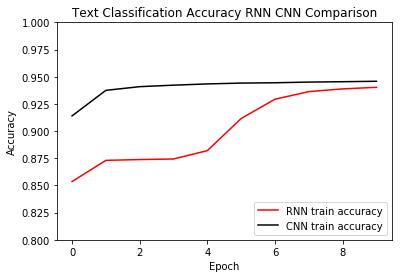

In [107]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='RNN train accuracy', color = 'r')
plt.plot(history_cnn.history['acc'], label = 'CNN train accuracy', color = 'k')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Text Classification Accuracy RNN CNN Comparison')

Text(0.5,1,'Text Classification Loss RNN CNN Comparison')

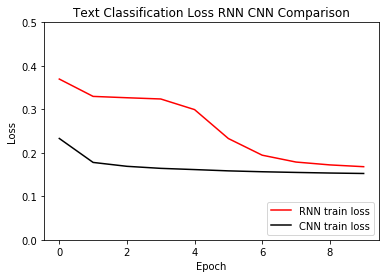

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='RNN train loss', color = 'r')
plt.plot(history_cnn.history['loss'], label = 'CNN train loss', color = 'k')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')
plt.title('Text Classification Loss RNN CNN Comparison')

In accuracy plot, CNN has average higher accuracy than RNN and in loss plot, CNN has less train loss than RNN. 

Thus, by choosing method of using sigmoid activation to collapse the output to between 0 and 1 with each category output being roughly independent of the others, CNN performs better than RNN model. 